### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

#### Load the health insurance dataset and check the first five observations

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('healthinsurance.csv')
df.head(5)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

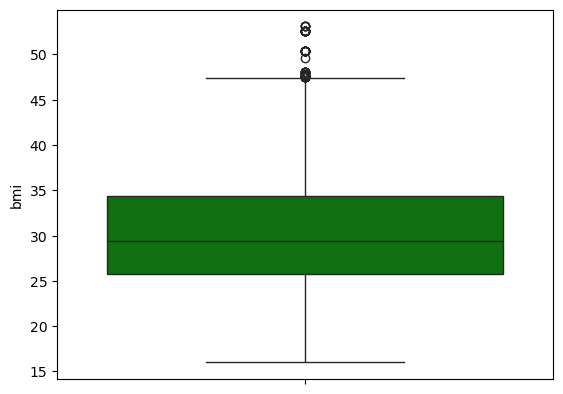

In [77]:
sns.boxplot(df['bmi'],color = 'g')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

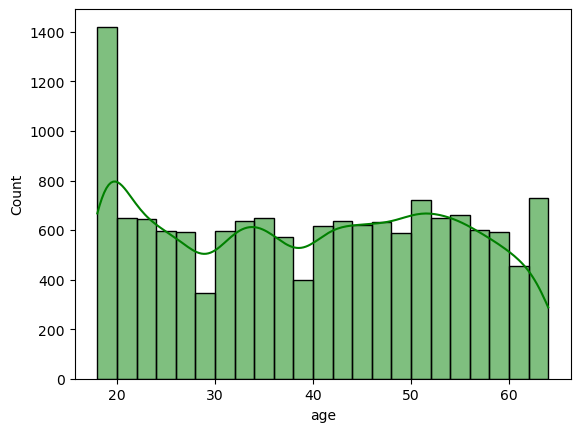

In [78]:
from warnings import filterwarnings
filterwarnings('ignore')

sns.histplot(df['age'],color='g',kde= True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
probability = (df['claim']<25000).mean()
probability.round(4) 

np.float64(0.8449)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

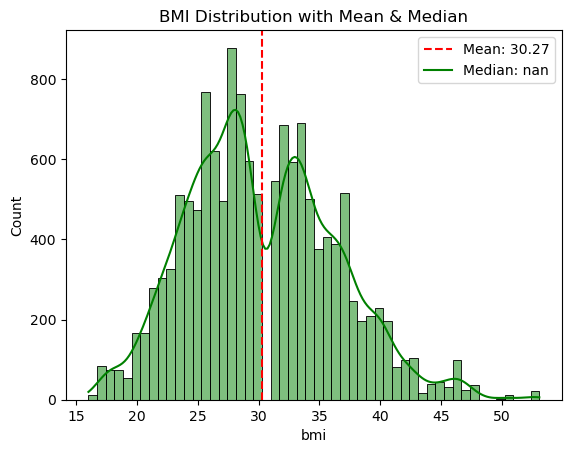

In [80]:
bmi = df['bmi']

# Plot histogram with KDE
sns.histplot(bmi, kde=True, color='g')

mean = np.mean(bmi)
median = np.median(bmi)

plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')

plt.legend()
plt.title("BMI Distribution with Mean & Median")
plt.show()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

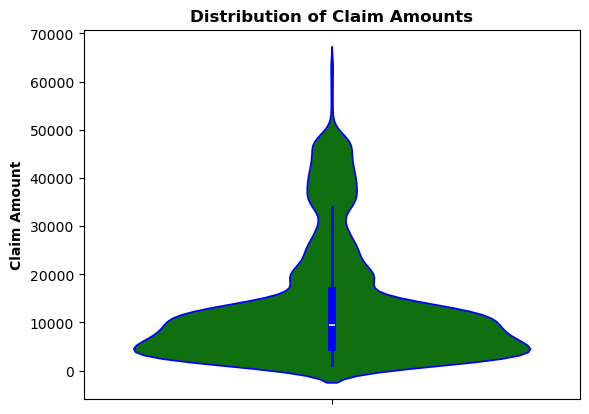

In [81]:
sns.violinplot(y=df['claim'],color = 'g',linecolor='blue')
plt.title('Distribution of Claim Amounts',fontweight = 'bold')
plt.ylabel('Claim Amount',fontweight = 'bold')
plt.show()

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
high_cost = df[(df['age'] < 30) & (df['claim'] > 40000)]
high_cost

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
381,22.0,male,54,52.6,HeartDisease,1,1,Memphis,62,1,0,Photographer,44501.4
753,28.0,male,84,36.4,NoDisease,1,1,Cambridge,78,1,0,Engineer,51194.6
1480,22.0,male,54,52.6,HeartDisease,1,1,Chicago,62,1,0,Photographer,44501.4
1761,25.0,male,58,45.5,Cancer,2,1,Cambridge,78,1,1,FilmMaker,42112.2
1822,23.0,female,54,46.2,EyeDisease,1,1,AtlanticCity,50,1,0,Student,40904.2
1825,29.0,female,82,35.3,NoDisease,1,1,Hartford,81,1,1,Engineer,48130.9
2361,28.0,male,84,36.4,NoDisease,1,1,Brimingham,78,1,0,Engineer,51194.6
2468,28.0,male,84,36.4,NoDisease,1,1,Warwick,78,1,0,Engineer,51194.6
2619,28.0,male,84,36.4,NoDisease,1,1,SanLuis,78,1,0,Engineer,51194.6
2751,22.0,male,54,52.6,HeartDisease,1,1,Fargo,62,1,0,Photographer,44501.4


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

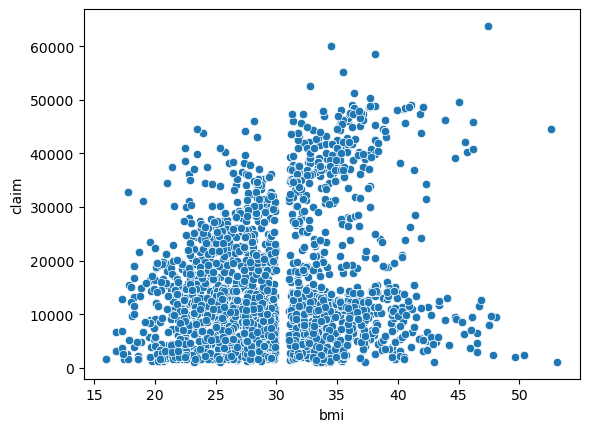

In [36]:
sns.scatterplot(x=df['bmi'],y=df['claim'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
bmi_by_gender=df.groupby('sex')['bmi'].mean()
bmi_by_gender.round(2).to_frame().astype(str) + ' %'

,bmi
sex,
female,29.81 %
male,30.76 %


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
male = df[df['sex'] == 'male']
male_region = male['city'].value_counts()
top_region =male_region.idxmax()
count = male_region.max()
print(f"The region with the highest number of males is '{top_region}' with {count} individuals.")

The region with the highest number of males is 'Charlotte' with 151 individuals.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

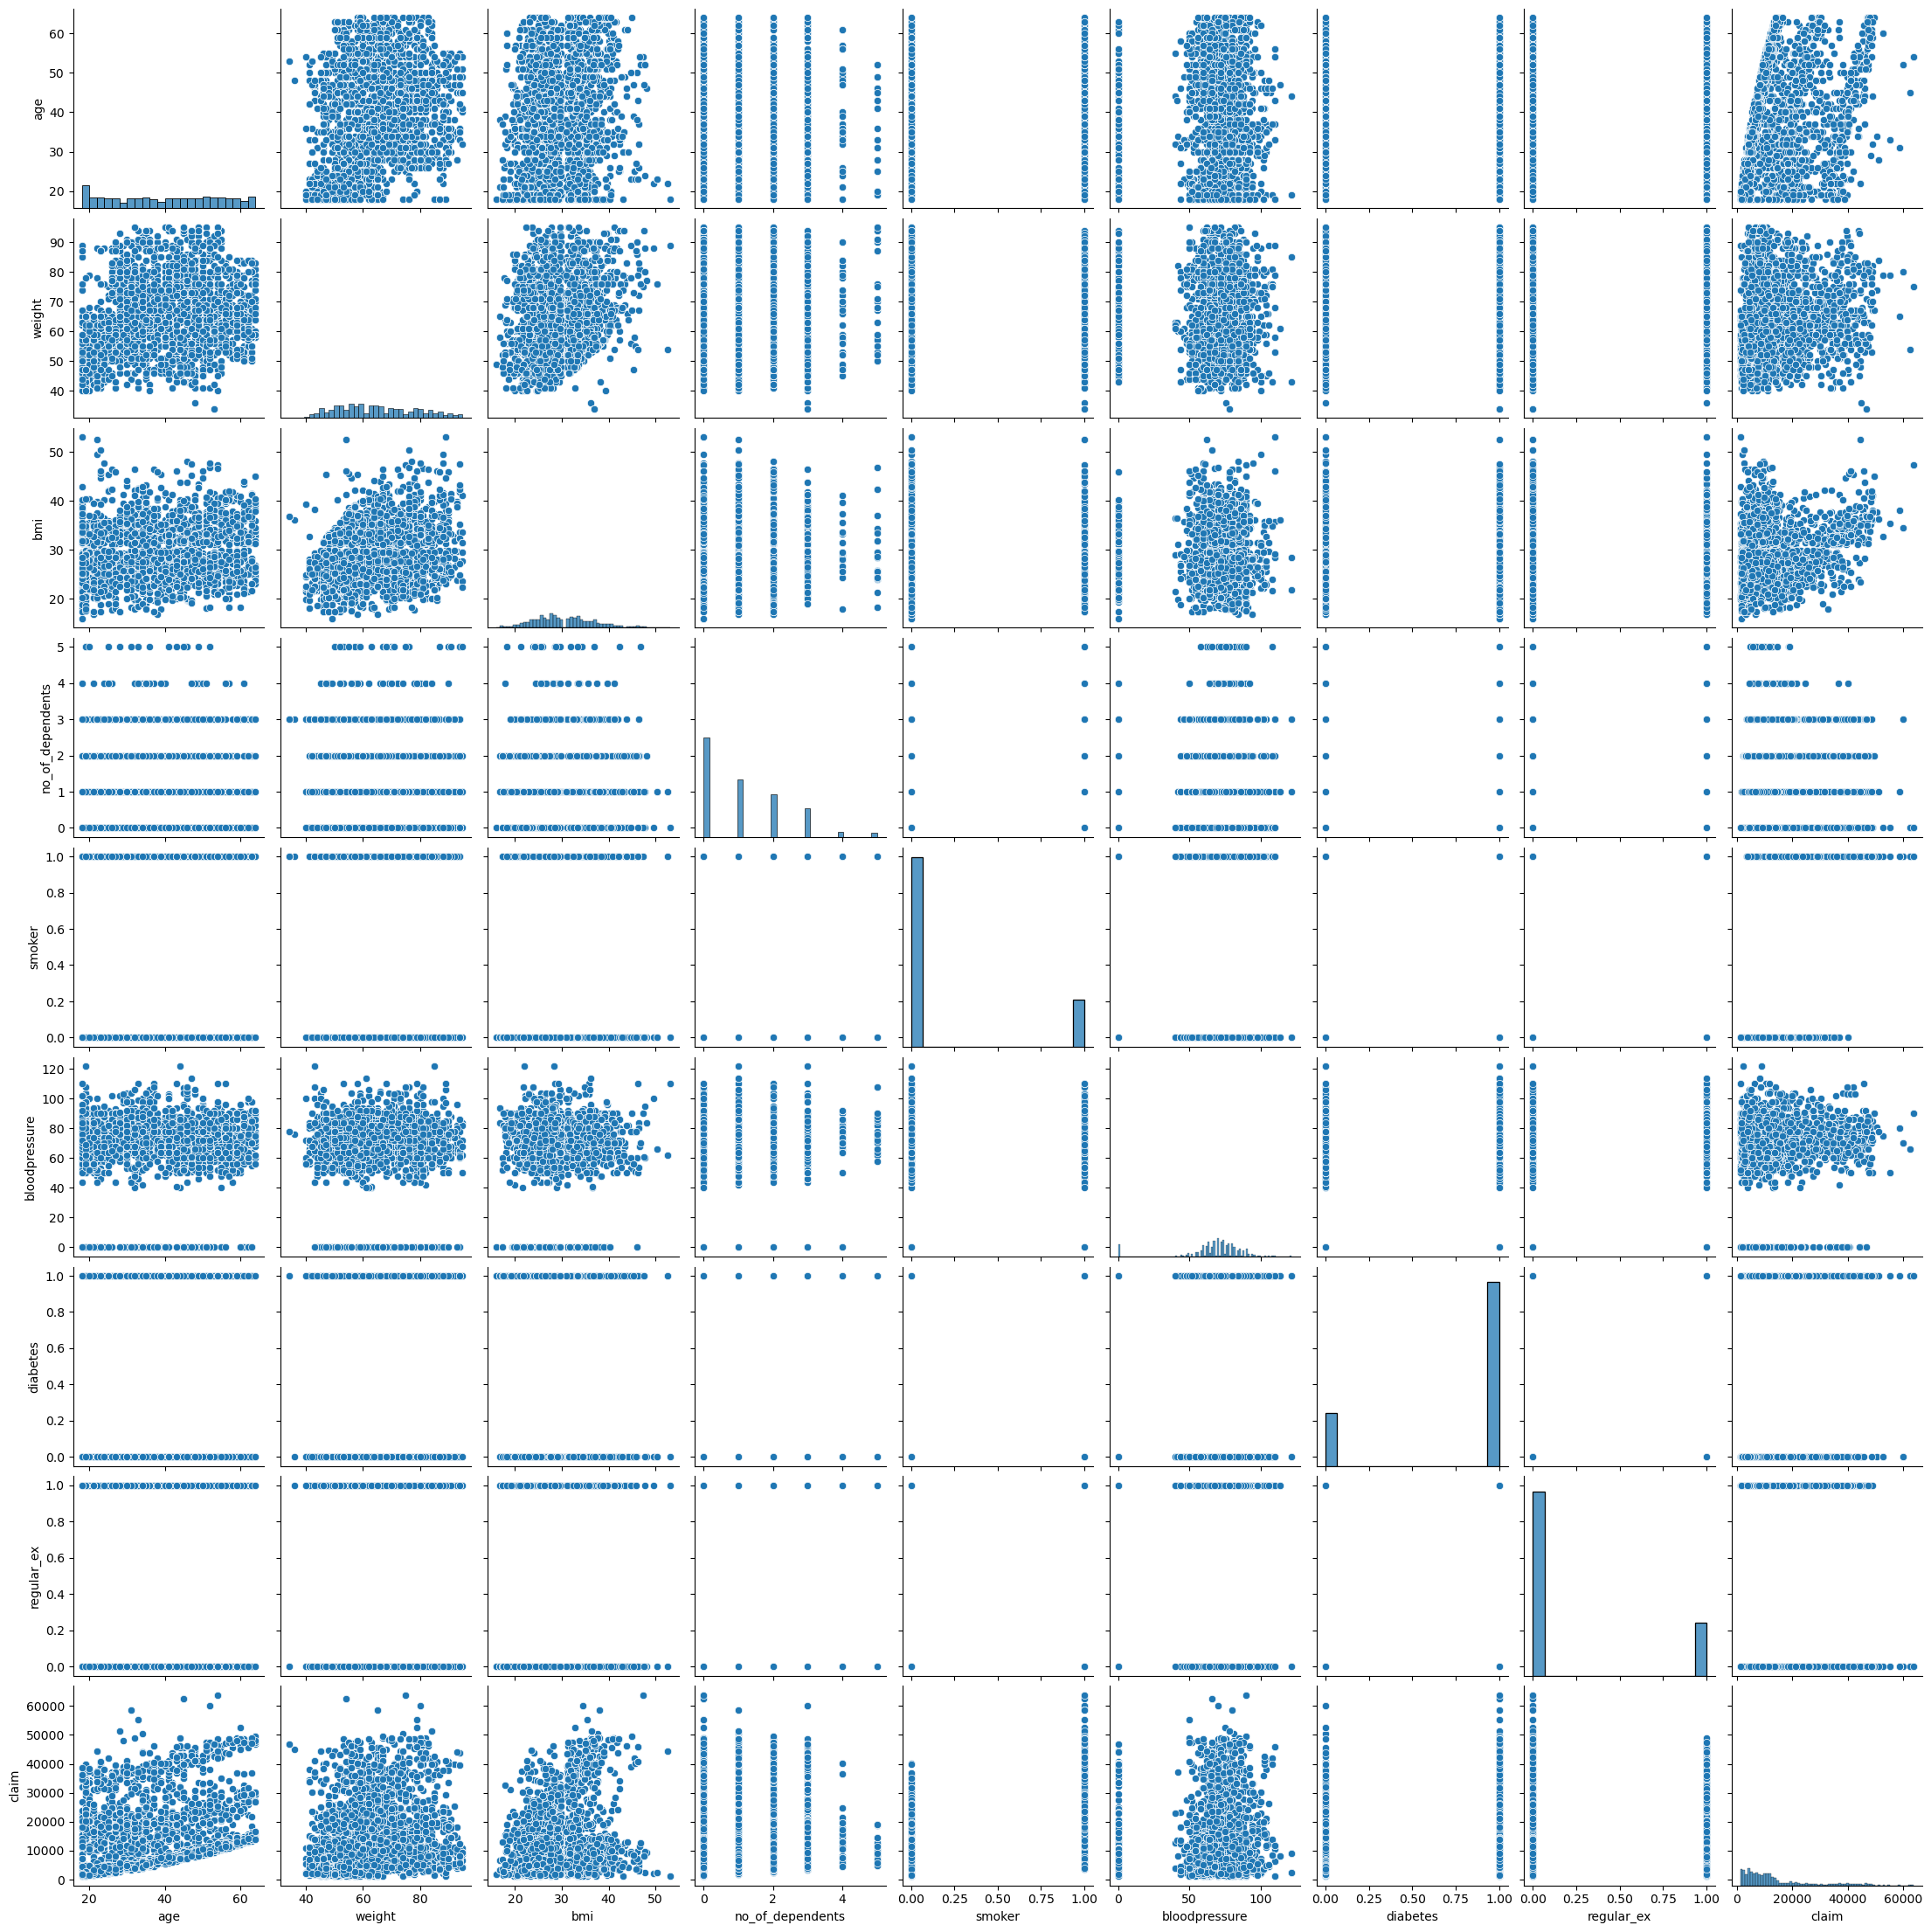

In [62]:
df_numerical=df.select_dtypes(include='number')
sns.pairplot(df_numerical)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

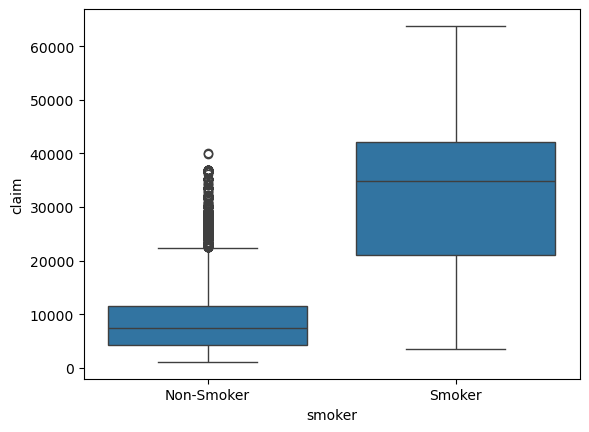

In [64]:
sns.boxplot(x='smoker', y='claim', data=df)
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

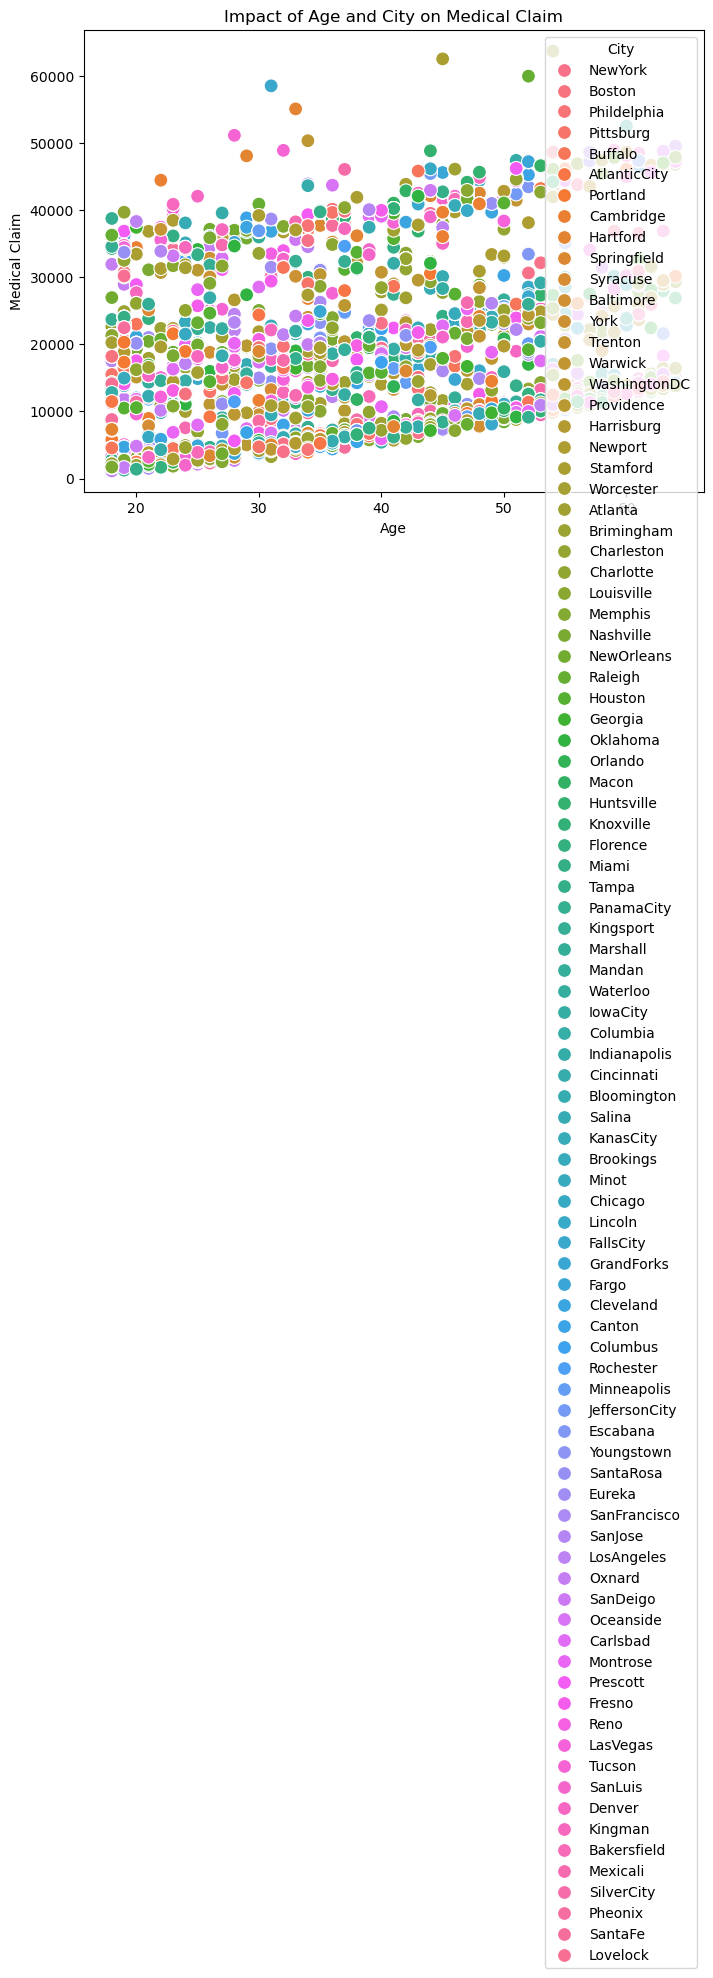

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='claim', hue='city', data=df, s=100)
plt.title('Impact of Age and City on Medical Claim')
plt.xlabel('Age')
plt.ylabel('Medical Claim')
plt.legend(title='City')
plt.show()

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# check the categories of the variable
df.city.unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

In [25]:
pd.get_dummies(df,columns=['city']).head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,...,city_Syracuse,city_Tampa,city_Trenton,city_Tucson,city_Warwick,city_WashingtonDC,city_Waterloo,city_Worcester,city_York,city_Youngstown
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,...,False,False,False,False,False,False,False,False,False,False
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,...,False,False,False,False,False,False,False,False,False,False
2,32.0,female,64,17.8,Epilepsy,2,1,88,1,1,...,False,False,False,False,False,False,False,False,False,False
3,61.0,female,53,36.4,NoDisease,1,1,72,1,0,...,False,False,False,False,False,False,False,False,False,False
4,19.0,female,50,20.6,NoDisease,0,0,82,1,0,...,False,False,False,False,False,False,False,False,False,False


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
df['smoker_label'] = df['smoker'].map({0: 'Non-Smoker',1: 'Smoker'})
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,smoker_label
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,Non-Smoker
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,Non-Smoker
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Smoker
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,Smoker
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,Non-Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2,Smoker
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3,Non-Smoker
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5,Non-Smoker
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6,Non-Smoker


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
df['gender_freq'] = df['sex'].value_counts()

gender_freq.to_frame()

,count
sex,
female,7652
male,7348


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:
df['smoker_label'] = df['smoker'].map({0: 'Non-Smoker',1: 'Smoker'})
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,smoker_label
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,Non-Smoker
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,Non-Smoker
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Smoker
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,Smoker
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,Non-Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2,Smoker
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3,Non-Smoker
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5,Non-Smoker
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6,Non-Smoker


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [110]:
print("Minimum value of the sale",df['bmi'].min())
print("Maximum value of the sale",df['bmi'].max())

Minimum value of the sale 16.0
Maximum value of the sale 53.1


In [111]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df['minmax_bmi']=min_max.fit_transform(df[['bmi']])
print("Minimum value of the sale",df['minmax_bmi'].min())
print("Maximum value of the sale",df['minmax_bmi'].max())

Minimum value of the sale 0.0
Maximum value of the sale 1.0


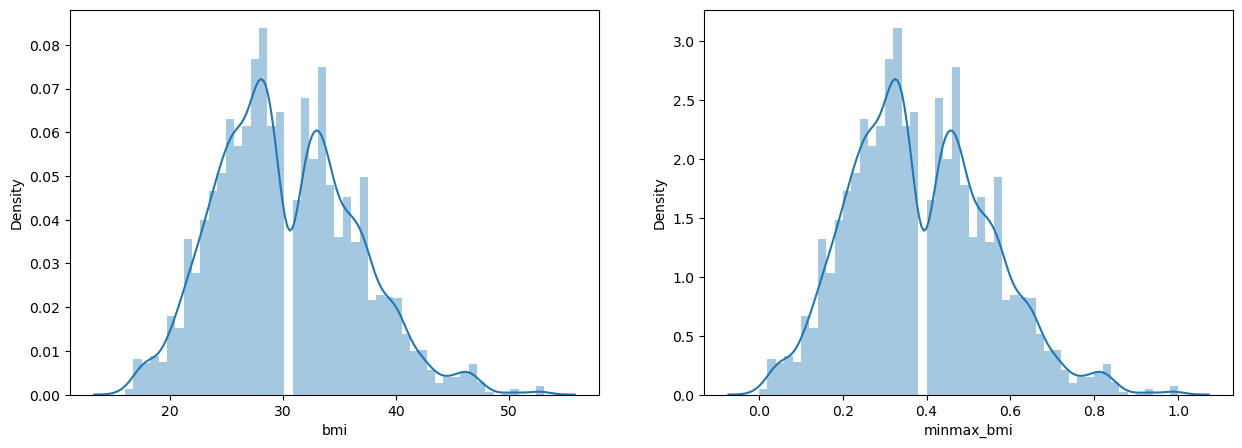

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['bmi'])

plt.subplot(1,2,2)
sns.distplot(df['minmax_bmi'])

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [127]:
age_min = df['age'].min()
age_max = df['age'].max()

print("Min age:", age_min)
print("Max age:", age_max)

Min age: 18.0
Max age: 64.0


In [132]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df['minmax_age']=min_max.fit_transform(df[['age']])
print("Minimum value of the sale",df['minmax_age'].min())
print("Maximum value of the sale",df['minmax_age'].max())

Minimum value of the sale 0.0
Maximum value of the sale 1.0


<Axes: xlabel='minmax_age', ylabel='Density'>

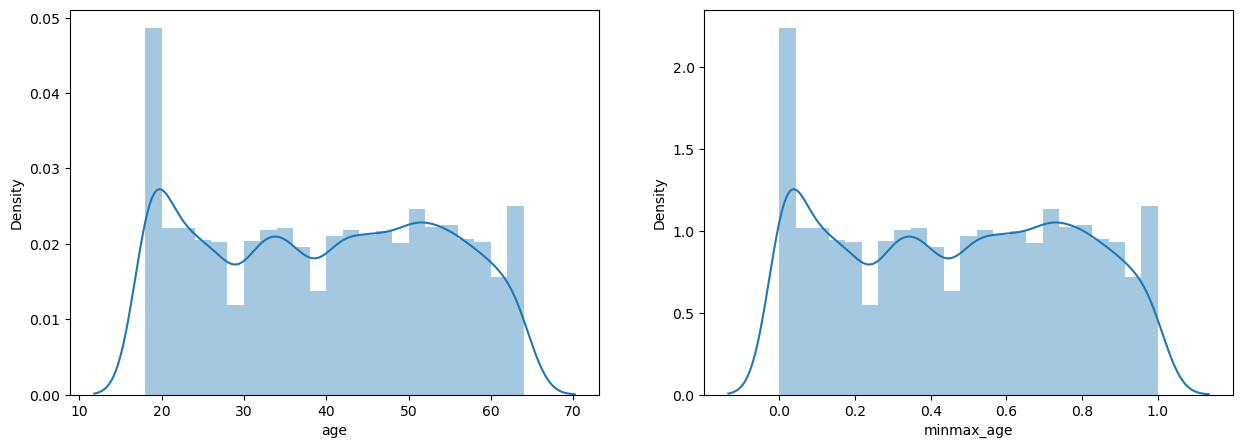

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['age'])

plt.subplot(1,2,2)
sns.distplot(df['minmax_age'])

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

Skewness: 1.4978293015042263


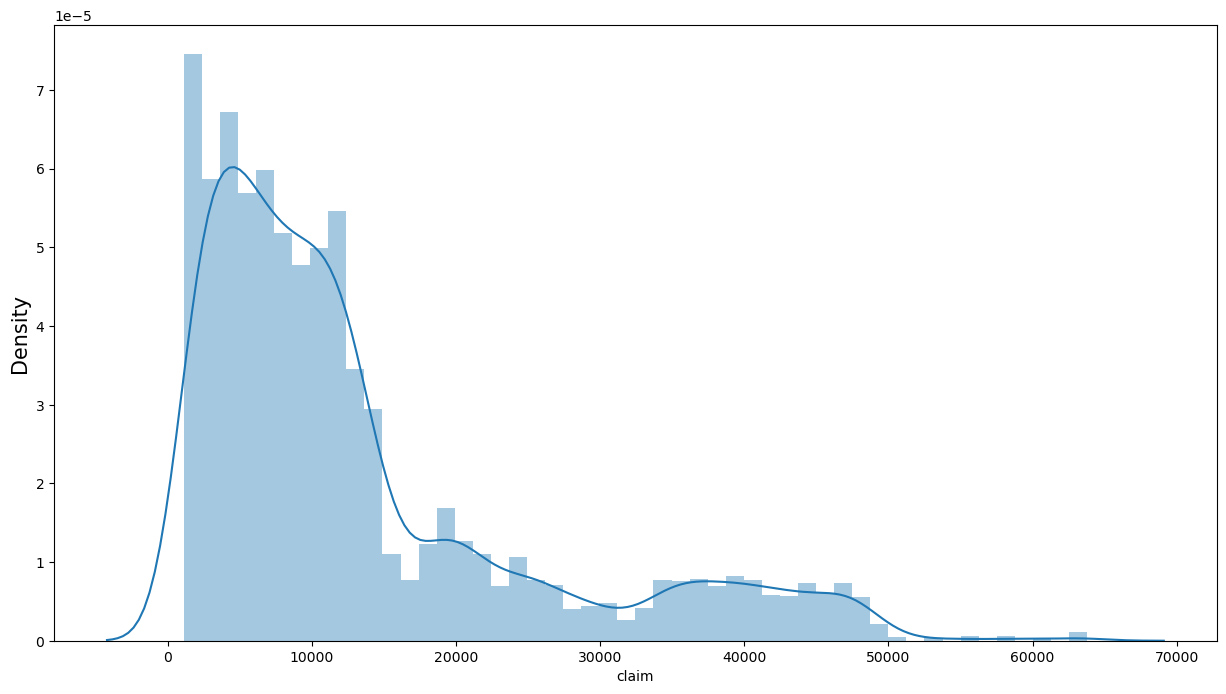

In [108]:
# set the figure size
plt.rcParams ["figure.figsize"] = [15,8]
# check the distribution of sales of the product
# ax: create an axes object in the figure
ax = sns.distplot (df['claim'])
# set the Label for x-axis

# coefficient of skewness
print('Skewness:', df["claim"].skew())
# set Label for y-axis
plt.ylabel('Density', fontsize=15)
# display the plot
plt.show()


Skewness: -0.07865154290544177


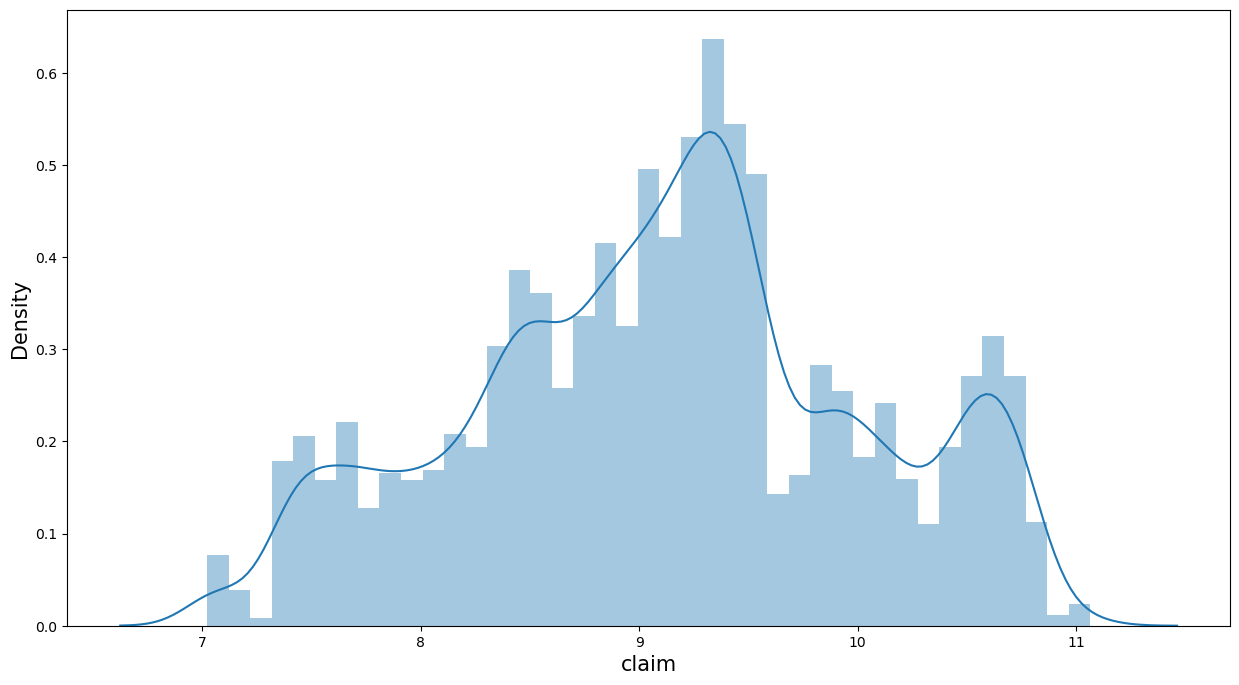

In [109]:
#set the figure size
plt.rcParams ["figure.figsize"] = [15,8]
# apply natural log transformation (with base 'e')
log_Item_Outlet_Sales=np.log(df['claim'])
# coefficient of skewness of transformed data
print('Skewness:', np.log(df ['claim']) .skew())

# distribution of log_transformed variable
# ax: create an axes object in the figure
ax = sns.distplot(np.log(df['claim' ]))
# set the Label for x-axis
ax.set_xlabel('claim', fontsize=15)
# set Label for y-axis
plt.ylabel('Density', fontsize=15)
# display the plot
plt.show()